In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = 'datasets/train.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
# Para conocer mas los datos pordemos hacer lo siguiente:
print('Este dataset contiene {} filas y {} columnas'.format(data.shape[0], data.shape[1]))
print('Columnas: {}'.format(data.columns.values.tolist()))

Este dataset contiene 891 filas y 12 columnas
Columnas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Se crea una función para ver las columnas que tiene algún dato nulo
def datos_nulos():
    columnas = data.columns.values.tolist()
    for c,i in enumerate(columnas):
        p = columnas[c]
        v = pd.isna(data[columnas[c]]).values.ravel().sum()
        print("Columnas {} = {}".format(p, v))

In [7]:
datos_nulos()

Columnas PassengerId = 0
Columnas Survived = 0
Columnas Pclass = 0
Columnas Name = 0
Columnas Sex = 0
Columnas Age = 177
Columnas SibSp = 0
Columnas Parch = 0
Columnas Ticket = 0
Columnas Fare = 0
Columnas Cabin = 687
Columnas Embarked = 2


In [8]:
# Limpiar la columna Age
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [9]:
# Limpiar la columna Cabin
data.drop('Cabin',axis=1,inplace=True)

In [10]:
# Liampiar la columna Embark
data.dropna(inplace=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
datos_nulos()

Columnas PassengerId = 0
Columnas Survived = 0
Columnas Pclass = 0
Columnas Name = 0
Columnas Sex = 0
Columnas Age = 0
Columnas SibSp = 0
Columnas Parch = 0
Columnas Ticket = 0
Columnas Fare = 0
Columnas Embarked = 0


### Explorar en conjunto de datos

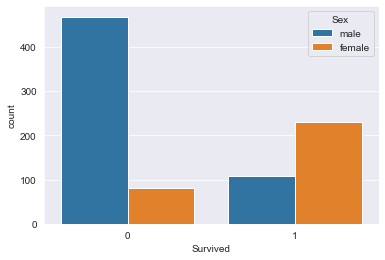

In [13]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=data)

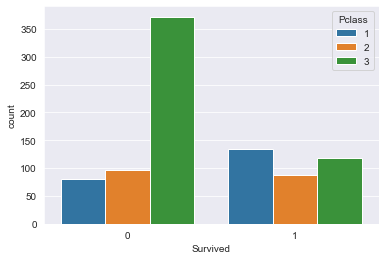

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=data)

C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


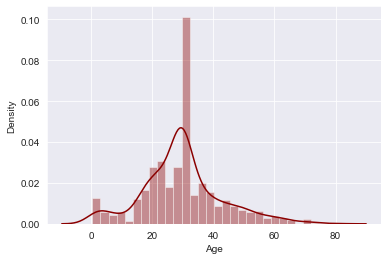

In [21]:
sns.set_style('darkgrid')
sns.distplot(data['Age'], bins=30, color='darkred')

Observa que gran porcentaje de los datos pasan la curva y rompen con la normalidad de los datos, es muy seguro que los datos que limpiamos sean los causantes. Se ajustará este panorama para mejorar la normalidad de los datos en las siguientes líneas.

In [22]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


In [23]:
corr_datos_age = pd.read_csv(path)

In [24]:
tipo_pclass = pd.unique(corr_datos_age['Pclass'])
tipo_pclass

array([3, 1, 2], dtype=int64)

In [25]:
esnulo = corr_datos_age['Age'].isna().sum()
noesnulo = corr_datos_age['Age'].notna().sum()
total_datos_age = esnulo + noesnulo
print("""
Información de la columna Age:

Datos Nulos: {}
Datos No Nulos: {}
Total de los datos: {}
""".format(esnulo, noesnulo, total_datos_age))


Información de la columna Age:

Datos Nulos: 177
Datos No Nulos: 714
Total de los datos: 891



In [26]:
pc_1 = corr_datos_age['Pclass'] == 1
pc_2 = corr_datos_age['Pclass'] == 2
pc_3 = corr_datos_age['Pclass'] == 3

#Validamos que est´na todos los valores
pc_1.sum() + pc_2.sum() + pc_3.sum()

891

In [27]:
mean_pc1_age = corr_datos_age[(pc_1)]['Age'].mean()
mean_pc2_age = corr_datos_age[(pc_2)]['Age'].mean()
mean_pc3_age = corr_datos_age[(pc_3)]['Age'].mean()

In [28]:
f1 = corr_datos_age[(pc_1)]['Age'].fillna(mean_pc1_age)
f2 = corr_datos_age[(pc_2)]['Age'].fillna(mean_pc2_age)
f3 = corr_datos_age[(pc_3)]['Age'].fillna(mean_pc3_age)

In [29]:
a = pd.concat([f1, f2, f3])
columna_age = a.sort_index()

C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


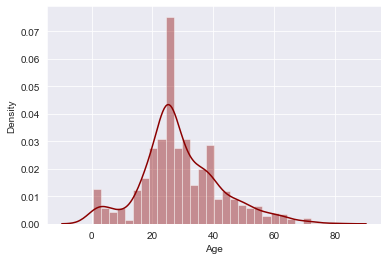

In [30]:
sns.set_style('darkgrid')
sns.distplot(columna_age, bins=30, color='darkred')

Seguimos teniendo esa media muy alta, pero es menor que la anterior.

Comparamos las medias para ver el ajuste.

In [33]:
data.Age.mean(), columna_age.mean()

(29.653446370674192, 29.29287479027204)

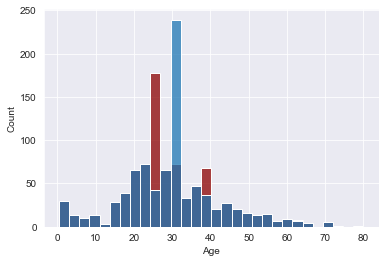

In [35]:
sns.set_style('darkgrid')
sns.histplot(columna_age, bins=30, color='darkred', kde=False)
sns.histplot(data['Age'], bins=30, kde=False)

Tenemos un ajuste considerable, veamos los cuadrados para ver si tiene un impacto estadístico en el conjunto de datos.

In [37]:
# Se cambia la columna de edad por que tiene un mejor ajuste de datos nulos
data['Age'] = columna_age

## Etapa: Desarrollo del Conjunto de Datos
### Identificar las Variables Dummy

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
categories = ["Sex", "Embarked"]
# Se crea una función para automatizar el proceso de crear variables dummies
def variables_dummie(data):
    lista_conc = []
    lista_conc.append(data)    
    for indice, variables in enumerate(categories):
        d = pd.get_dummies(data[categories[indice]], prefix = categories[indice]).iloc[:,1:]
        lista_conc.append(d)            
    conc = pd.concat(lista_conc, axis=1)
    return conc

In [40]:
data = variables_dummie(data = data)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Seleccionar las Variables Predictoras

In [55]:
bank_data_vars = data.columns.values.tolist()
Y = ['Survived']
X = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

In [44]:
#from sklearn import datasets
from sklearn.feature_selection import RFE
#from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()
n = 2

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [47]:
rfe = RFE(lr, n)
rfe = rfe.fit(data[X], data[Y].values.ravel())

C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anacon

In [48]:
print(rfe.support_)

[False  True False False False False  True False False]


In [49]:
print(rfe.ranking_)

[8 1 4 3 5 7 1 6 2]


In [52]:
# Se crea un lista para ver que variables son las más importantes
z = zip(X, rfe.support_, rfe.ranking_)

In [53]:
list(z)

[('PassengerId', False, 8),
 ('Pclass', True, 1),
 ('Age', False, 4),
 ('SibSp', False, 3),
 ('Parch', False, 5),
 ('Fare', False, 7),
 ('Sex_male', True, 1),
 ('Embarked_Q', False, 6),
 ('Embarked_S', False, 2)]

### Implementar la Función

In [56]:
X = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
Y = data['Survived']

In [57]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X, Y)

C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logit_model.score(X,Y)

0.8098987626546682

R-squared: Entre mayor sea este valor es mejor para el modelo, significa que los puntos de la regresión están muy pegados a la línea de regresión. Por el contrario, si es cercano a 0, es porque los puntos están muy separados de la línea.

In [59]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,PassengerId,[0.0003034268672435248]
1,Pclass,[-0.9842821768991259]
2,Age,[-0.02938354982725297]
3,SibSp,[-0.2629036139314556]
4,Parch,[-0.021956053064369832]
5,Sex_male,[-2.4518676882528947]
6,Embarked_Q,[0.0025677786057396886]
7,Embarked_S,[-0.2968613150095884]


### Validar modelo

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)
lm = LogisticRegression()
lm.fit(X_train, Y_train)

C:\Users\LOPP02.DRELM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
probs = lm.predict_proba(X_test)

In [64]:
prediction = lm.predict(X_test)
len(prediction)

267

In [66]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
14,15,3,14.000000,0,0,0,0,1
159,160,3,25.140620,8,2,1,0,1
763,764,1,36.000000,1,2,0,0,1
741,742,1,36.000000,1,0,1,0,1
483,484,3,63.000000,0,0,0,0,1
262,263,1,52.000000,1,1,1,0,1
619,620,2,26.000000,0,0,1,0,1
707,708,1,42.000000,0,0,1,0,1
534,535,3,30.000000,0,0,0,0,1
549,550,2,8.000000,1,1,1,0,1


In [70]:
def datos_nulos(data_c):
    columnas = data_c.columns.values.tolist()
    for c, i in enumerate(columnas):
        p = columnas[c]
        v = pd.isna(data_c[columnas[c]]).values.ravel().sum()
        print("Columna {} = {}".format(p, v))
datos_nulos(X_test)

Columna PassengerId = 0
Columna Pclass = 0
Columna Age = 0
Columna SibSp = 0
Columna Parch = 0
Columna Sex_male = 0
Columna Embarked_Q = 0
Columna Embarked_S = 0


In [68]:
X_test.columns.values.tolist()

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [72]:
len(X_test)

622

In [77]:
prediction = lm.predict(X_train)

### Conclusión

En este proceso se pueden hacer gran cantidad de cosas, en este caso solo vamos a crear un archivo con las predicciones de los datos.

In [78]:
final_data = pd.DataFrame(
    {
        'PassengerId': X_train.PassengerId,
        'Survived': prediction
    }
)

In [80]:
final_data.to_csv('datasets/result_survived_correct.csv', index=False)

In [81]:
data_pre = pd.read_csv('datasets/result_survived_correct.csv')

In [84]:
data_pre.head(622)

,PassengerId,Survived
0,352,0
1,126,0
2,579,1
3,424,0
4,120,0
5,13,0
6,159,0
7,129,1
8,426,0
9,237,0


In [83]:
len(data_pre)

622